<a href="https://colab.research.google.com/github/chasubeen/ESAA_8th_YB/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니 프로젝트 (1)
- 관련 사이트: https://dacon.io/competitions/open/235536/data

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 10개 이상 출력하고, 그래프 그리기 (데이터 전처리는 예시 참고)

  조건: 변수 2개 이상 연결한 결과값 포함

* 위의 주소에서 데이터를 다운받은 후, 사이트의 내용을 참고하여 새로 알고자 하는 내용으로 데이터를 분석하시면 됩니다. 분석은 train.csv 파일만을 이용하시면 됩니다.

* 분석 파일을 github에 업로드 후 링크를 과제함에 댓글로 달아주시면 됩니다.

* 데이터 전처리 및 분석 예시는 카페에 업로드 되어 있으니 참고 바랍니다.

* 제출기한: 2023.04.03 (월) 23:59

# **1. 라이브러리 및 데이터**


In [1]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기
# 참고 블로그: https://teddylee777.github.io/colab/colab-korean 

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 데이터 불러오기
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ESAA 8기/YB/3주차/data/movies_train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ESAA 8기/YB/3주차/data/movies_test.csv")
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ESAA 8기/YB/3주차/data/submission.csv") # 제출용 파일

# **2. 탐색적 자료분석(EDA)**



## **2-1. 일부 데이터 미리보기**


+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [5]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [6]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


In [7]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [8]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


## **2-2. 데이터 요약**


In [9]:
print(train.shape)
print(test.shape)
print(submission.shape)

(600, 12)
(243, 11)
(243, 2)


- 600개의 데이터로 모델을 학습시키고 243개의 영화의 관객수를 예측해야 하는 과제
- train에는 12개의 열이 있고, test에는 관객수(box_off_num)를 제외한 11개의 열이 존재함


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


## **2-3. 데이터의 요약통계량 확인**

In [12]:
pd.options.display.float_format = '{:.1f}'.format # 소숫점 자리수 출력값 format 설정

In [13]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


In [14]:
test.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
count,243.0,107.0,243.0,243.0,243.0
mean,109.8,891669.5,0.9,159.3,3.5
std,124.0,1217341.5,1.2,163.0,2.1
min,40.0,34.0,0.0,0.0,0.0
25%,91.0,62502.0,0.0,18.0,2.0
50%,104.0,493120.0,0.0,105.0,3.0
75%,114.5,1080849.6,1.0,282.0,4.0
max,2015.0,6173099.5,6.0,776.0,16.0


## **2-4. 결측치 확인 및 데이터 전처리**


### **a) 결측치 확인**

In [15]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [16]:
test.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

- train과 test 모두 ```dir_prev_bfnum```(해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수) 변수에 결측값이 존재한다.



In [17]:
### 결측값의 특성 확인

train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [18]:
test[test['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
5,회오리 바람,모쿠슈라,드라마,2010-02-25,95,15세 관람가,장건재,NaN,0,156,2
6,경계도시 2,시네마 달,다큐멘터리,2010-03-18,104,15세 관람가,홍형숙,NaN,0,11,2
7,이웃집 남자,(주)루믹스미디어,드라마,2010-03-18,100,청소년 관람불가,장동홍,NaN,0,117,5


In [19]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())
print(test[test['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0
0


- train과  test 모두 dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num(해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수)이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 
- 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [20]:
train['dir_prev_bfnum'].fillna(0, inplace = True)
test['dir_prev_bfnum'].fillna(0, inplace = True)

### **b) 데이터 타입 전처리**

- release_time은 시간에 관련된 데이터인데 ```int```형으로 인식되고 있다. 
  - release_time을 ```datetime``` 형식으로 변환한다.



In [21]:
train['release_time']=pd.to_datetime(train['release_time'])
test['release_time']=pd.to_datetime(test['release_time'])

In [22]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387


In [23]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,300529.0,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,342700.2,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4206610.7,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,691342.0,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,31738.0,1,380,1


## **2-5. 데이터 시각화 및 분석**

### **a) 평균 관객수가 가장 많은 영화 장르**
- 예제 코드에서 제공됨

In [24]:
genre = train[['genre','box_off_num']].groupby('genre').mean().sort_values('box_off_num', ascending = False)
genre

,box_off_num
genre,
느와르,2263695.1
액션,2203974.1
SF,1788345.7
코미디,1193914.0
드라마,625689.8
공포,590832.5
미스터리,527548.2
멜로/로맨스,425968.0
애니메이션,181926.7


<Axes: ylabel='genre'>

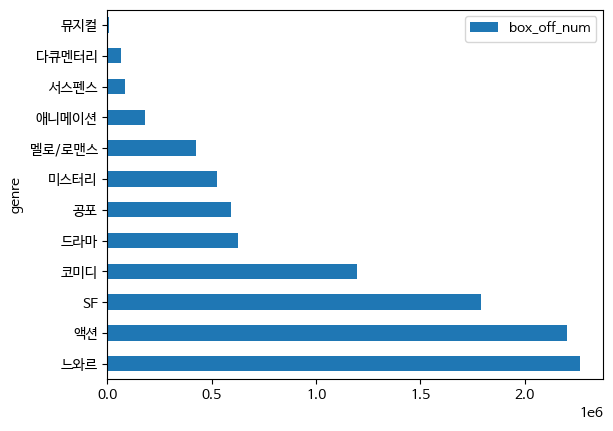

In [25]:
genre.plot(kind = 'barh')

- 느와르가 가장 관객수가 많은 편이고 그 다음으로는 액션, SF, 코메디 순이다. 평균 관객수가 가장 낮은 영화 장르는 뮤지컬이다.

### **b) 영화를 가장 많이 제작하는 배급사 top 10?**
- 예제 코드에서 제공됨




In [26]:
distributor = train['distributor'].value_counts().sort_values(ascending = False)[:10]
distributor

CJ 엔터테인먼트    54
롯데엔터테인먼트     52
(주)NEW       30
(주)마운틴픽쳐스    29
(주)쇼박스       26
인디스토리        26
골든타이드픽처스     15
(주) 케이알씨지    14
(주) 영화사조제    10
영화사 진진       10
Name: distributor, dtype: int64

<Axes: >

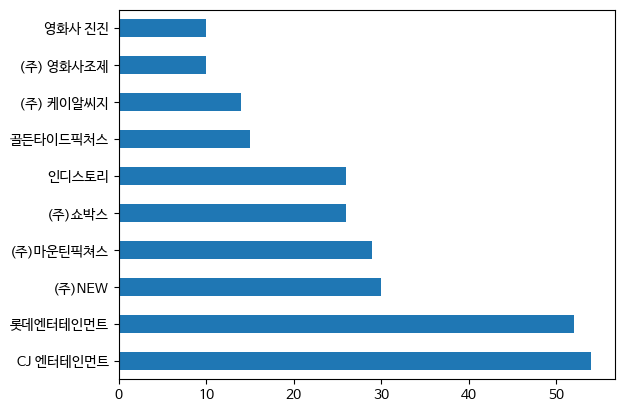

In [27]:
distributor.plot(kind = 'barh')

### **c) 영화 개봉 월에 따른 평균 관객수**
- 예제 코드에서 제공됨

In [28]:
# 년도, 월, 일, 요일 별 칼럼 따로 만들기
train['release_year'] = train['release_time'].dt.year # 년도
train['release_month'] = train['release_time'].dt.month # 월
train['release_day'] = train['release_time'].dt.day     # 일
train['release_weekday'] = train['release_time'].dt.weekday # 요일

test['release_year'] = test['release_time'].dt.year # 년도
test['release_month'] = test['release_time'].dt.month # 월
test['release_day'] = test['release_time'].dt.day     # 일
test['release_weekday'] = test['release_time'].dt.weekday # 요일

In [29]:
release_month = train[['release_month','box_off_num']].groupby('release_month').mean().sort_values('box_off_num', ascending = False)
release_month

,box_off_num
release_month,
1,1365930.6
12,1288247.7
7,1113807.2
8,1029161.7
9,731528.6
2,663025.2
5,575685.2
6,512286.5
11,495653.9


##### **💚 barplot**

<Axes: xlabel='release_month'>

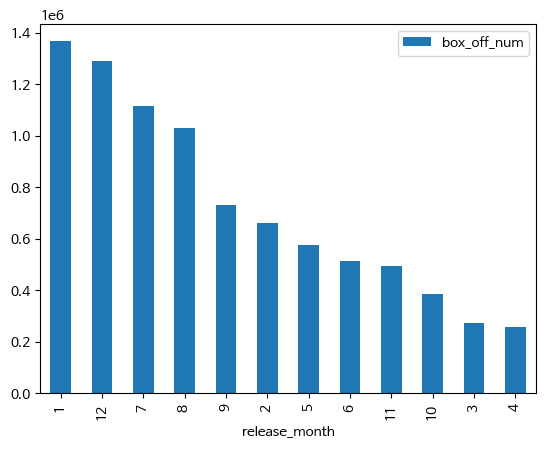

In [30]:
# 월별 평균 관객 수 분포

release_month.plot(kind = 'bar')

##### **💚boxplot**

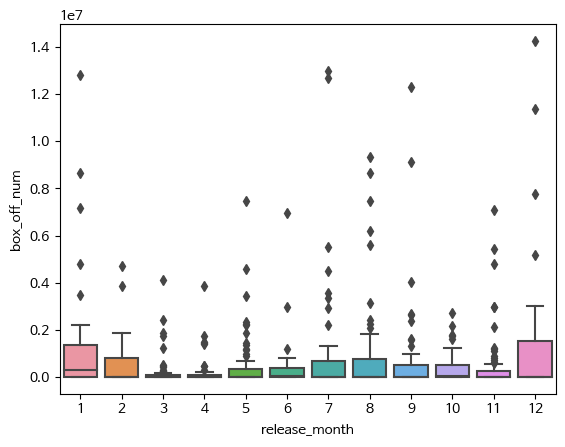

In [31]:
# 월별 관객 수 분포

boxplot = plt.subplots()
boxplot = sns.boxplot(x = 'release_month', y = 'box_off_num', data = train)

- 월별 평균을 따져봤을 때 1월, 12월, 7월, 8월이 상대적으로 높은 것으로 보아 방학때 개봉하는 영화가 관람객 수가 많다. 
- boxplot 시각화 결과 월과 무관하게 관객수가 많은 영화들이 존재하는 것을 확인할 수 있다.
  - 월 이외에 관객수에 영향을 미치는 다른 변수가 존재함을 의미

### **d) 영화 관객수와 관련 있는 변수 파악하기**
- (c)에 의해 새로운 변수들이 생성됨
  - release_year(연도), release_month(월), release_day(일), release_weekday(요일)
- 상관계수를 시각화

In [32]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,release_day,release_weekday
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,2012,11,22,3
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,2015,11,19,3
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083,2013,6,5,2
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866,2012,7,12,3
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387,2010,11,4,3


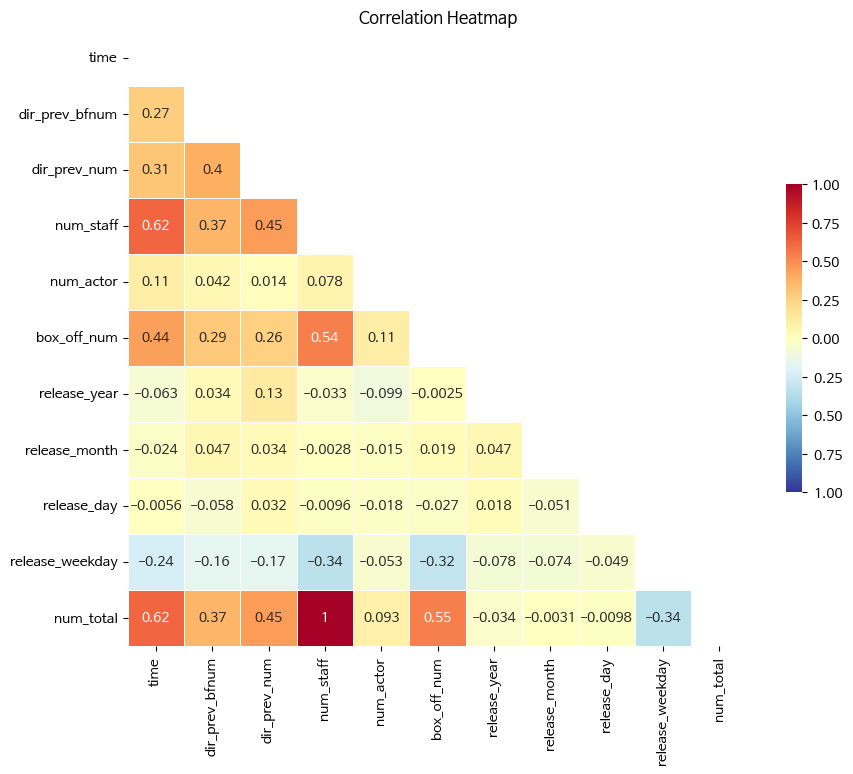

In [59]:
### 상관계수 시각화

corr = train.corr()

# 그림 사이즈 지정
fig, ax = plt.subplots(figsize = (10,8))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# 하삼각행렬만 시각화(밑에만)
sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시
            mask = mask,      # 표시하지 않을 마스크 부분을 지정
            linewidths=.5,  # 경계면을 실선으로 구분하기
            cbar_kws={"shrink": .5}, # 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위: -1 ~ 1(상관계수의 범위)
           )  

plt.title('Correlation Heatmap')
plt.show()

### **e) 요일별 영화 관객수**
- 어느 요일에 영화를 개봉해야 사람들이 많이 보러 올까
- 요일의 경우 현재 숫자형으로 인코딩된 상태
  - 0 ~ 6이 순서대로 월 ~ 일

In [34]:
release_weekday = train[['release_weekday','box_off_num']].groupby('release_weekday').mean().sort_values('box_off_num', ascending = False)
release_weekday

,box_off_num
release_weekday,
1,2591569.0
2,2237699.1
3,372299.0
4,48651.0
0,434.0
5,353.0


<Figure size 500x500 with 0 Axes>

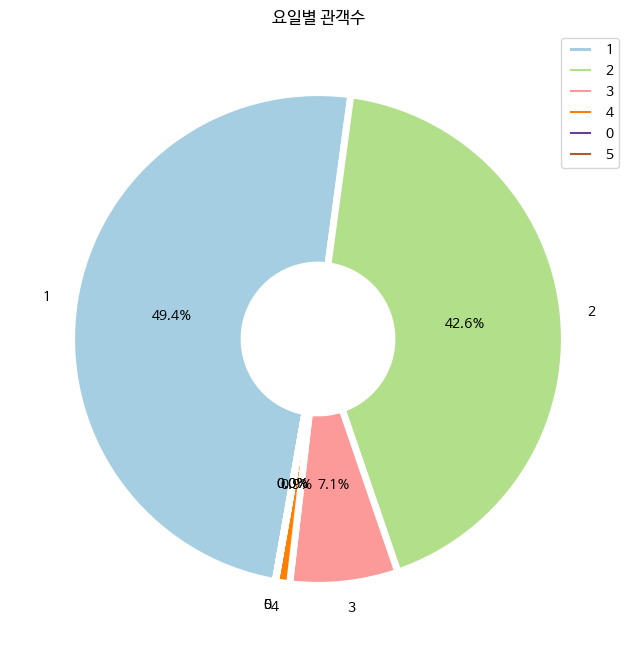

In [58]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize = (5,5))
release_weekday.plot(kind = 'pie', y = 'box_off_num', ylabel='', colormap = 'Paired', 
                     autopct = '%.1f%%', startangle = 260, counterclock = False, wedgeprops = wedgeprops)
plt.title('요일별 관객수')
plt.legend()

- 월요일, 화요일이 전체 관객수의 90% 이상을 차지한다.

### **f) 장르별 평균 상영시간**
- 모든 장르를 다 파악하기엔 가시성이 떨어지므로, 관객 수 기준 상위 10개 장르만 파악
- 가설> SF 장르가 비교적으로 길고, 상대적으로 애니메이션의 상영 시간이 짧을 것이다.

In [36]:
train.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,release_day,release_weekday
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,2012,11,22,3
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,2015,11,19,3
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083,2013,6,5,2


In [37]:
time_per_genre = train[['genre','time','box_off_num']].groupby('genre').mean().sort_values('box_off_num', ascending = False)[:10]
time_per_genre = time_per_genre.drop('box_off_num',axis = 1).sort_values('time',ascending = False)
time_per_genre

,time
genre,
느와르,115.4
액션,114.5
서스펜스,112.0
코미디,105.3
드라마,104.7
미스터리,102.6
SF,101.4
공포,100.2
멜로/로맨스,96.6


In [38]:
### 평균 상영시간

time_per_genre = pd.DataFrame(time_per_genre.sort_values(by = 'time', ascending = False))
time_per_genre

,time
genre,
느와르,115.4
액션,114.5
서스펜스,112.0
코미디,105.3
드라마,104.7
미스터리,102.6
SF,101.4
공포,100.2
멜로/로맨스,96.6


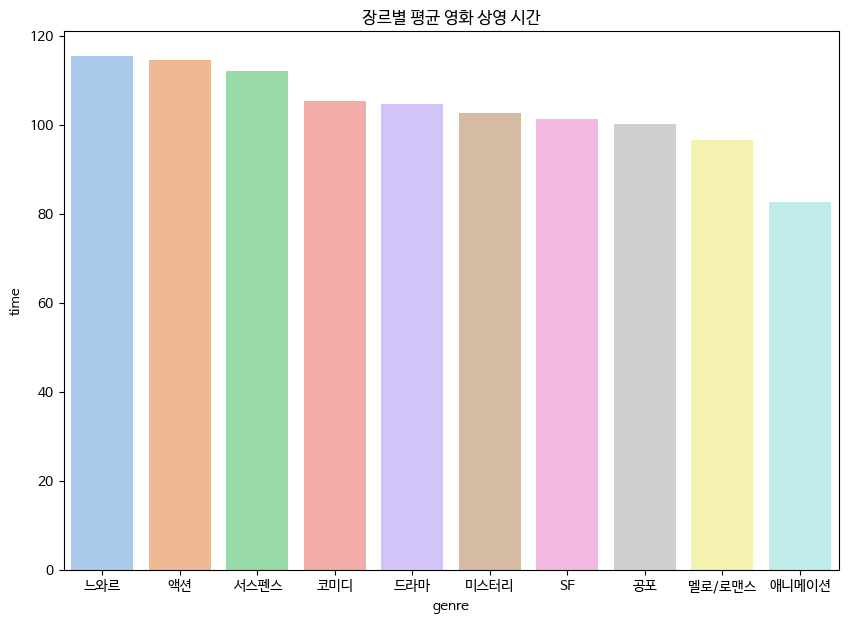

In [60]:
plt.figure(figsize = (10,7))
sns.barplot(x = time_per_genre.index, y = 'time', data = time_per_genre, palette = 'pastel')
plt.title('장르별 평균 영화 상영 시간')
plt.show()

- 느와르 장르가 상영시간이 가장 길고, 애니메이션이 가장 짧다.
  - 아동의 집중력이 짧아서..?

### **g) 장르별 영화 개봉작 수 top5**

In [40]:
genre_open = train[['genre','title']].groupby('genre').count()
genre_open.columns = ['count']
genre_open = genre_open.sort_values('count',ascending = False)[:5]
genre_open

,count
genre,
드라마,221
다큐멘터리,93
멜로/로맨스,78
코미디,53
공포,42


- 드라마 장르의 개봉작 수가 압도적으로 많고(2위와 2배 이상 차이남), 그 뒤를 이어 다큐멘터리, 멜로/로맨스, 코미디, 공포 순이다.

Text(0.5, 1.0, '개봉작 수가 많은 장르 top5')

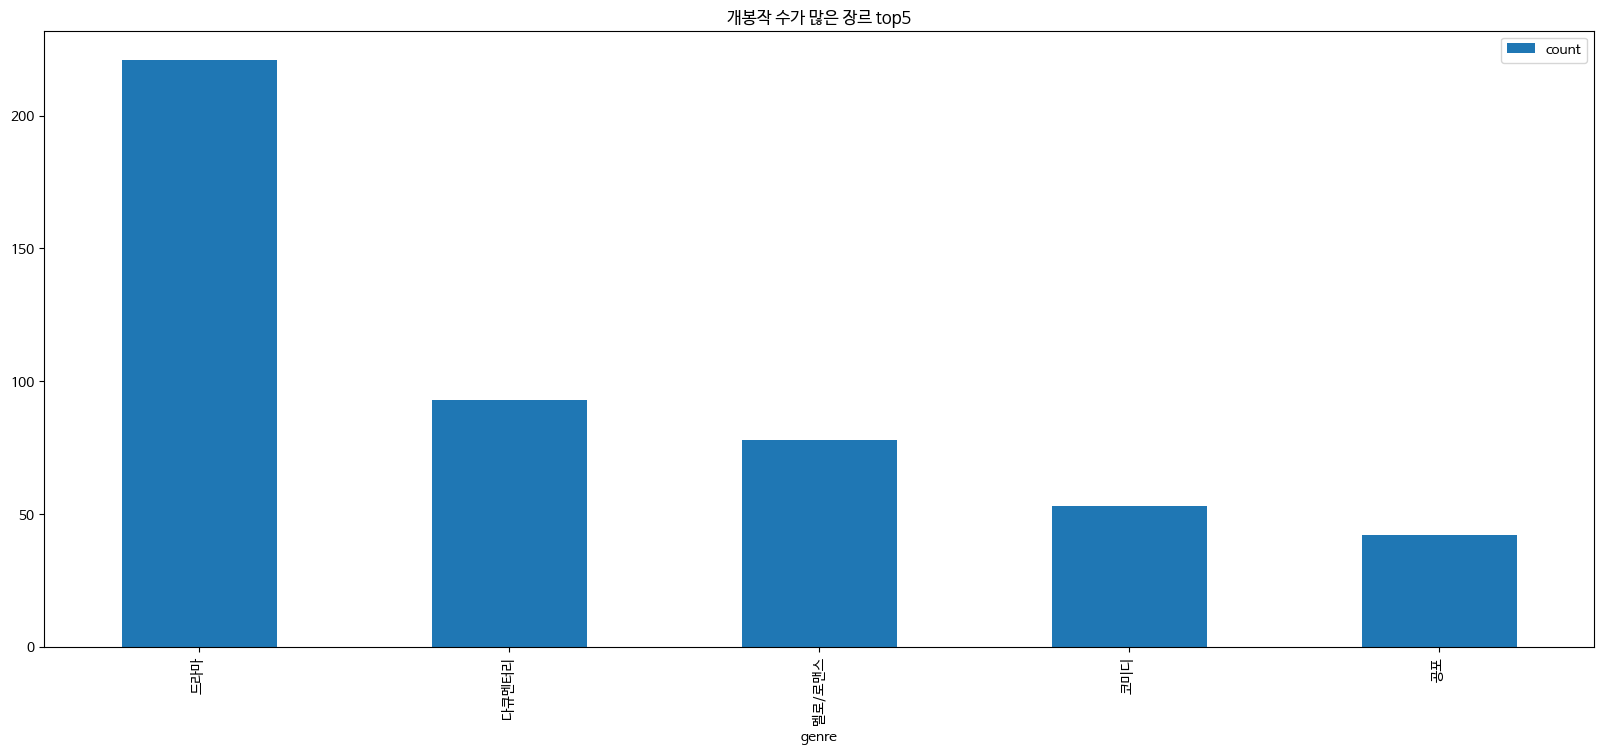

In [61]:
genre_open.plot(kind = 'bar')
plt.title("개봉작 수가 많은 장르 top5")

### **h) 계절별 많이 개봉되는 장르 top5**

In [42]:
### 계절 구분하기
# 봄: 3월 ~ 5월
# 여름: 6 ~ 8월
# 가을: 9 ~ 11월
# 겨울: 12 ~ 2월

def get_season(x):
  if x == 3 or x == 4 or x == 5:
    return 'spring'
  elif x == 6 or x == 7 or x == 8:
    return 'summer'
  elif x == 9 or x == 10 or x == 11:
    return 'autumn'
  else:
    return 'winter'

In [43]:
train['release_season'] = train['release_month'].apply(get_season)
train.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,release_day,release_weekday,release_season
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,2012,11,22,3,autumn
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,2015,11,19,3,autumn
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083,2013,6,5,2,summer


In [44]:
genre_spring = train.loc[train['release_season'] == 'spring',['title','genre']].groupby('genre').count().sort_values('title',ascending = False)[:5]
genre_spring.columns = ['count']
genre_spring

,count
genre,
드라마,61
다큐멘터리,27
멜로/로맨스,26
코미디,11
느와르,8


In [45]:
genre_spring.index

Index(['드라마', '다큐멘터리', '멜로/로맨스', '코미디', '느와르'], dtype='object', name='genre')

In [46]:
genre_summer = train.loc[train['release_season'] == 'summer',['title','genre']].groupby('genre').count().sort_values('title',ascending = False)[:5]
genre_summer.columns = ['count']
genre_summer

,count
genre,
드라마,36
공포,20
다큐멘터리,19
액션,11
멜로/로맨스,10


In [47]:
genre_autumn = train.loc[train['release_season'] == 'autumn',['title','genre']].groupby('genre').count().sort_values('title',ascending = False)[:5]
genre_autumn.columns = ['count']
genre_autumn

,count
genre,
드라마,74
멜로/로맨스,29
다큐멘터리,27
코미디,17
공포,12


In [48]:
genre_winter = train.loc[train['release_season'] == 'winter',['title','genre']].groupby('genre').count().sort_values('title',ascending = False)[:5]
genre_winter.columns = ['count']
genre_winter

,count
genre,
드라마,50
다큐멘터리,20
코미디,15
멜로/로맨스,13
느와르,8


<BarContainer object of 5 artists>

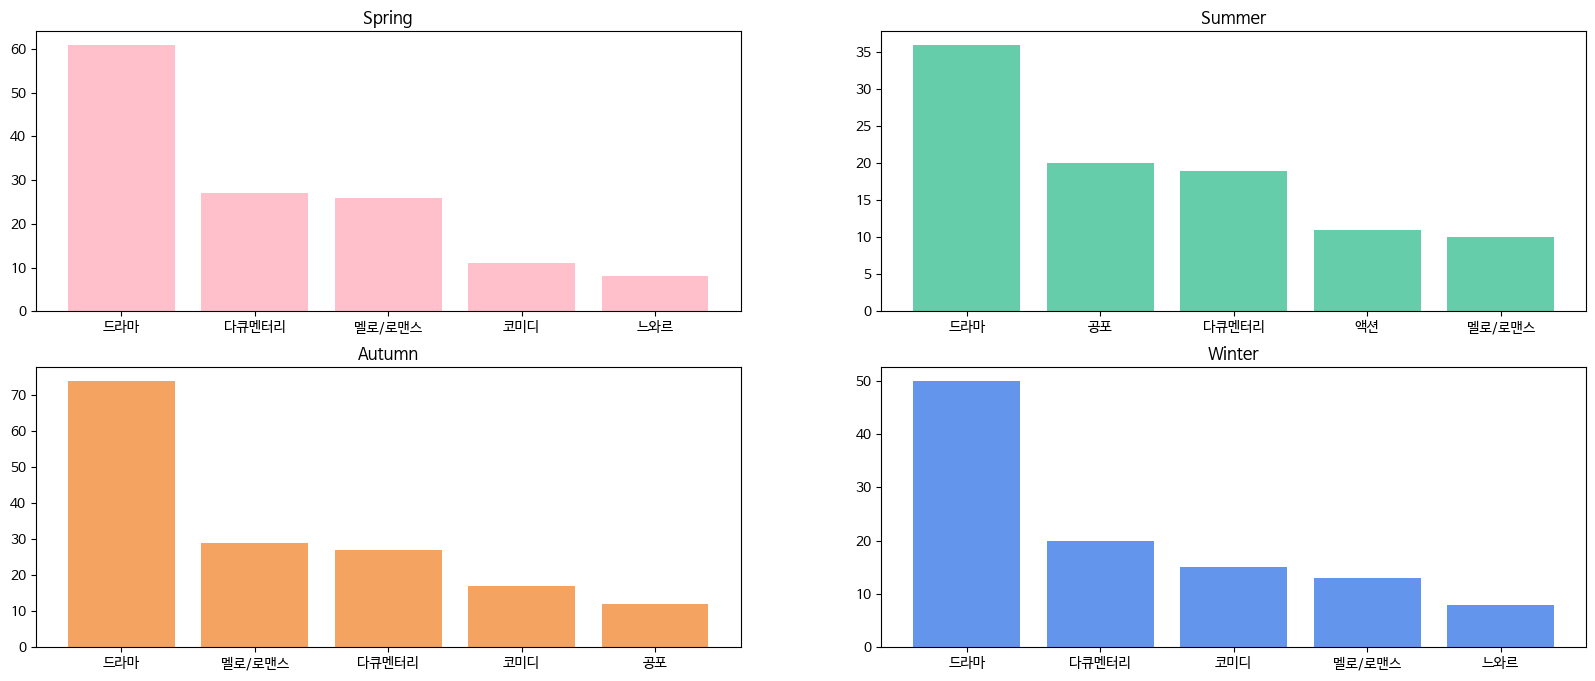

In [49]:
### 계절별로 많이 개봉하는 영화 top5
# figure를 suplots로 분할하여 사계절을 하나의 canvas에!

plt.rcParams['figure.figsize'] = [20, 8]

plt.subplot(2,2,1)
plt.title('Spring')
plt.bar(list(genre_spring.index), genre_spring['count'],color = 'pink')

plt.subplot(2,2,2)
plt.title('Summer')
plt.bar(list(genre_summer.index),genre_summer['count'],color = 'mediumaquamarine')

plt.subplot(2,2,3)
plt.title('Autumn')
plt.bar(list(genre_autumn.index),genre_autumn['count'], color = 'sandybrown')

plt.subplot(2,2,4)
plt.title('Winter')
plt.bar(list(genre_winter.index),genre_winter['count'],color = 'cornflowerblue')

- 대체로 전체 개봉작 수(1년 기준)와 계절별 개봉작 수의 순위는 비슷한 경향을 보인다.
- 여름의 경우 공포영화 개봉작 수가 다른 계절에 비해 많다.
  - 진짜 여름에 사람들이 공포영화를 많이 봐서 개봉작 수가 많은 것일까? 

### **i) 공포영화를 가장 많이 보는 달**
- 과연 사람들은 여름에 공포영화를 많이 보는 것일까?

In [50]:
scary_movies = train.loc[train['genre'] == '공포',['box_off_num','release_month']].groupby('release_month').sum().sort_values('box_off_num',ascending = False)
scary_movies

,box_off_num
release_month,
8,8696468
10,4771054
5,3134965
7,3026010
6,2073412
11,1607097
3,778408
9,709400
4,11650


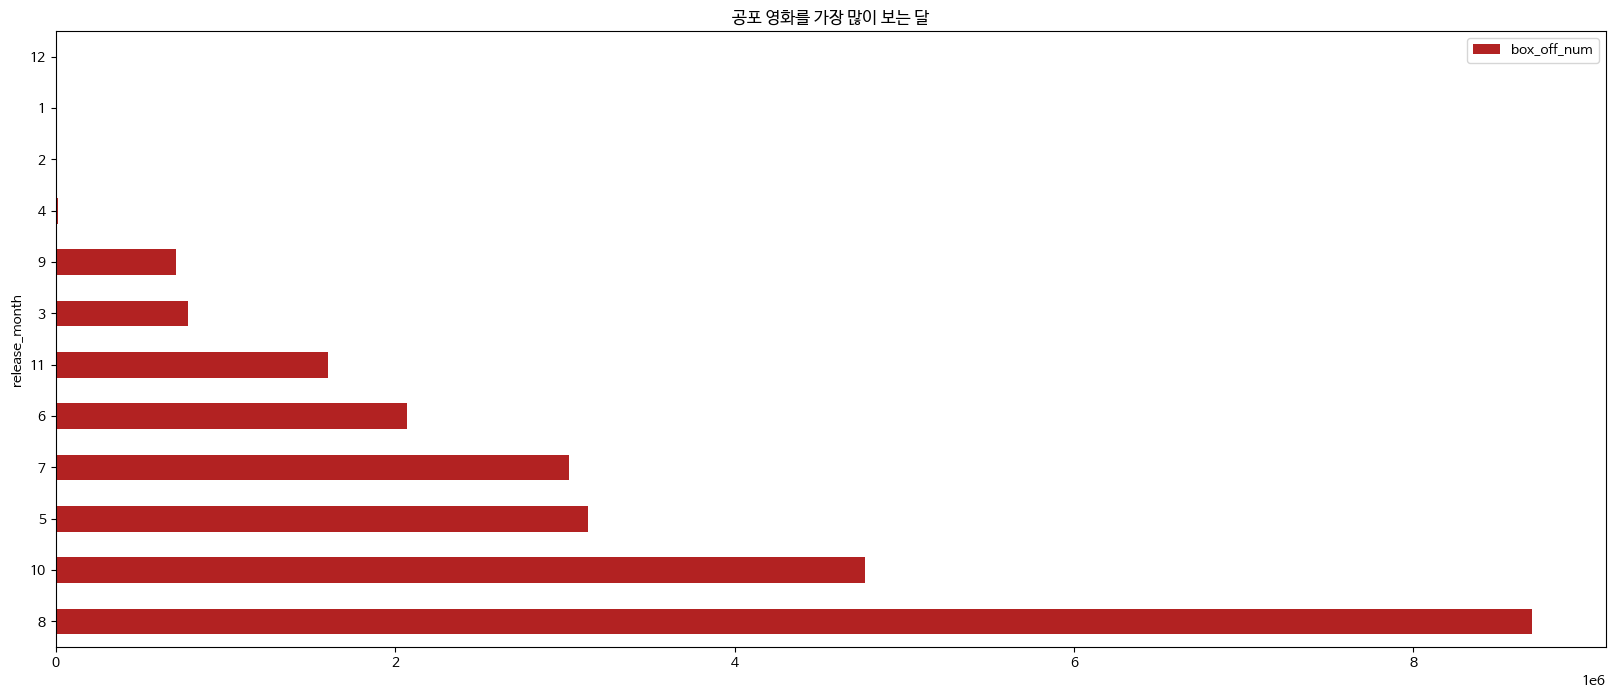

In [64]:
scary_movies.plot(kind = 'barh',color = 'firebrick')
plt.title("공포 영화를 가장 많이 보는 달")
plt.show()

- 주로 여름에 해당하는 6~8월에 공포영화가 많이 개봉을 한다.
  - 압도적으로 8월에 공포영화를 보는 사람들이 많다.(더우니까..?!)
- 예상 외로 10월달에도 공포영화를 보는 사람들이 많다.
  - 공포영화를 여름에만 볼 것이라는 편견을 버려..!

### **j) 영화 제작비 뽕뽑기**
- 스탭 수와 배우 수가 많은 영화들은 과연 성공했을까?

In [52]:
train['num_total'] = train['num_staff'] + train['num_actor']
train.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,release_day,release_weekday,release_season,num_total
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,2012,11,22,3,autumn,93
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,2015,11,19,3,autumn,390
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083,2013,6,5,2,summer,347


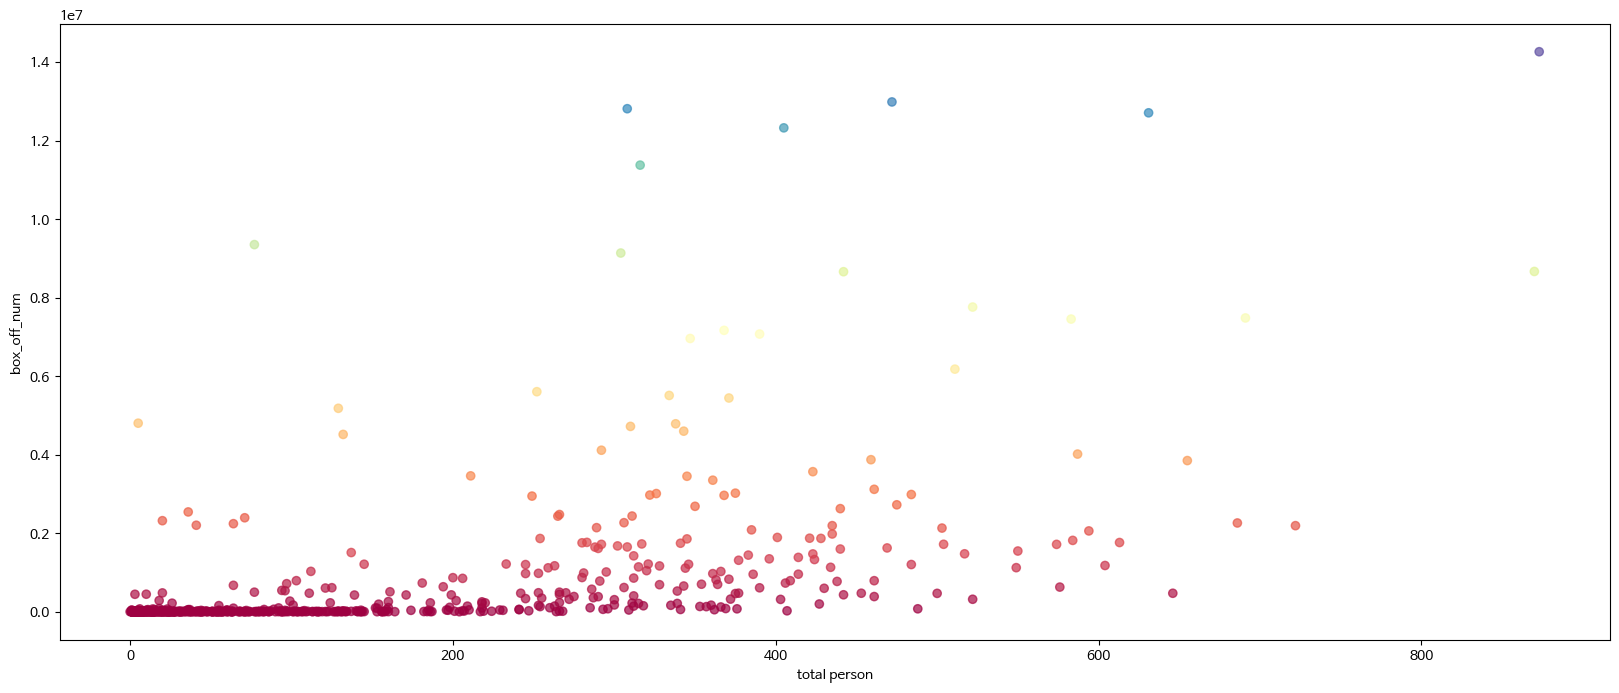

In [53]:
plt.scatter('num_total','box_off_num',data = train,c = 'box_off_num', alpha = 0.7, cmap = 'Spectral')
plt.xlabel('total person')
plt.ylabel('box_off_num')
plt.show()

- 저런,,,투입된 인원수와 흥행률은 그닥 상관이 없어 보인다.
  - 적은 인원수로도 대박이 나는 영화들이 많다.

### **h) 감독의 이전 작품수 vs 이번 영화 흥행**
- 감독이 영화를 찍어 본 경험이 많을수록 영화가 성공할 가능성이 높을까?

<Axes: xlabel='dir_prev_num', ylabel='box_off_num'>

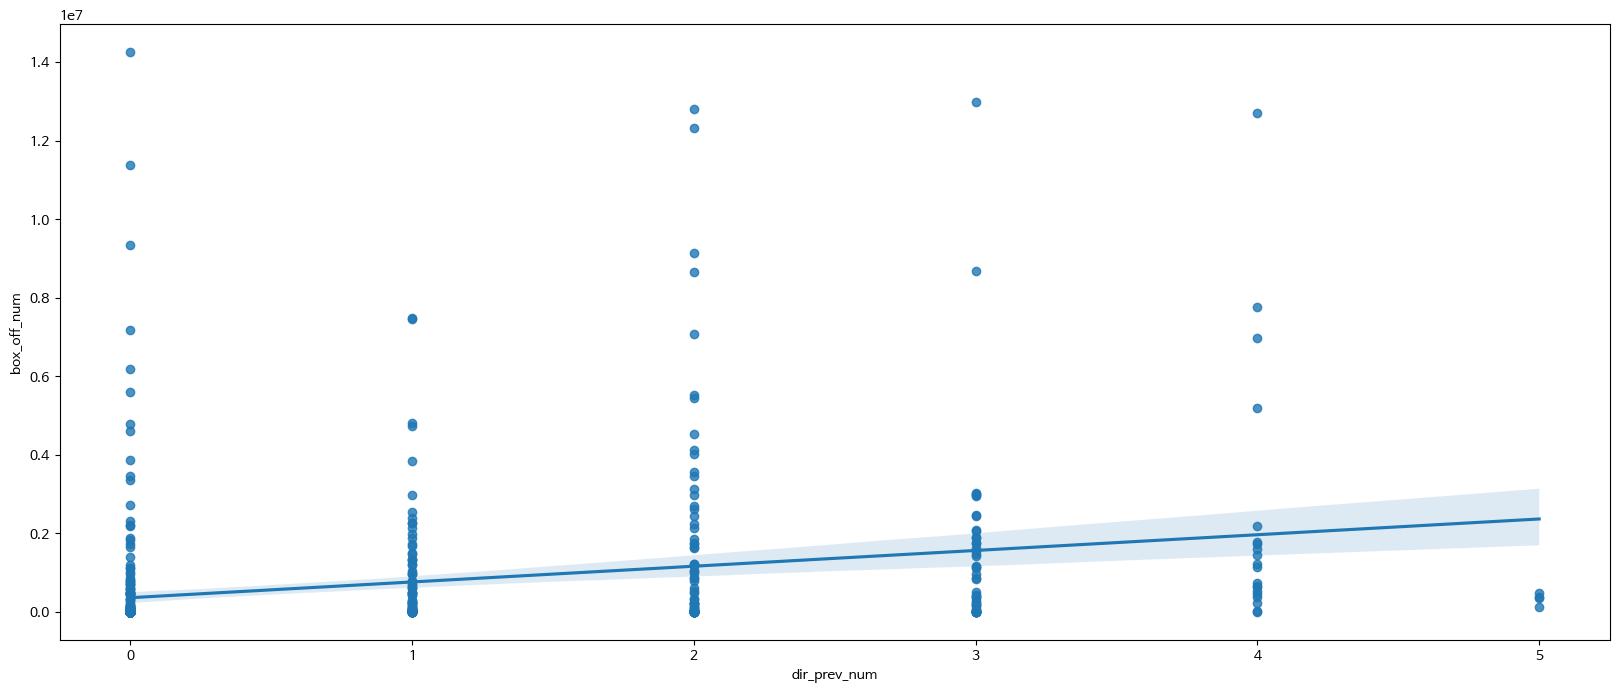

In [54]:
sns.regplot(x = 'dir_prev_num',y = 'box_off_num',data = train)

- 어느 정도의 관련성은 있어 보이지만, 뚜렷한 상관관계를 보이지는 않는다.
  - 상관계수: 0.26